In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from my_functions import initial_analysis
from my_functions import create_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Initial Analysis with Pandas

In [2]:
wine_df = pd.read_csv('winequality-red.csv')

In [3]:
initial_analysis(wine_df)

(1599, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

fixed acidity contains 96 unique values
volatile acidity contains 143 unique values
citric acid contains 80 unique values
residual sugar contains 91 unique values
chlorides contains 153 unique values
free sulfur dioxide contains 60 unique values
total sulfur dioxide contains 144 unique values
density contains 436 unique values
pH contains 89 unique values
sulphates contains 96 unique values
alcohol contains 65 unique values
quality contains 6 unique values
The dataframe contains 240 duplicated values


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


> The data is largely clean, with no issues. There 240 duplicates and no null values. 

> We have 12 features, all of them numerical. 

> The only thing I want to do in terms of cleaning is remove the duplicates.

- Fixed Acidity: Measures the concentration of non-volatile acids (like tartaric acid) in the wine. It contributes to the tartness and flavor of the wine.

- Volatile Acidity: Refers to the amount of acetic acid in the wine, which at too high of levels can lead to an unpleasant, vinegar taste.

- Citric Acid: Found in small quantities, citric acid can add 'freshness' and flavor to wines.

- Residual Sugar: Indicates the amount of sugar remaining after fermentation stops. It's usually more noticeable in sweet wines than in dry wines.

- Chlorides: The amount of salt in the wine.

- Free Sulfur Dioxide (SO2): The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

- Total Sulfur Dioxide: The amount of free and bound forms of S02; too much sulfur dioxide can make wine smell and taste unpleasant.

- Density: The density of the wine, which can be used to estimate the alcohol content.

- pH: Measures how acidic or basic the wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

- Sulphates: A wine additive that can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant.

- Alcohol: The percentage of alcohol content in the wine.

- Quality: A score given to the wine based on sensory data. This is usually a score between 0 and 10, where higher numbers indicate better quality.

## Data Cleaning

Issues 
- there are 240 duplicates

Solutions 
- remove the duplicates


In [4]:
wine_to_clean = wine_df.copy()

In [10]:
duplicate_rows = wine_to_clean.duplicated().sum()
duplicate_rows

240

In [11]:
wine_to_clean.drop_duplicates(inplace=True)

In [12]:
duplicate_rows = wine_to_clean.duplicated().sum()
duplicate_rows

0

In [13]:
wine_to_clean.to_csv(r'wine_clean.csv', index=False, header=True)

## EDA

### Univariate

In [2]:
wine_df = pd.read_csv('wine_clean.csv')

In [15]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


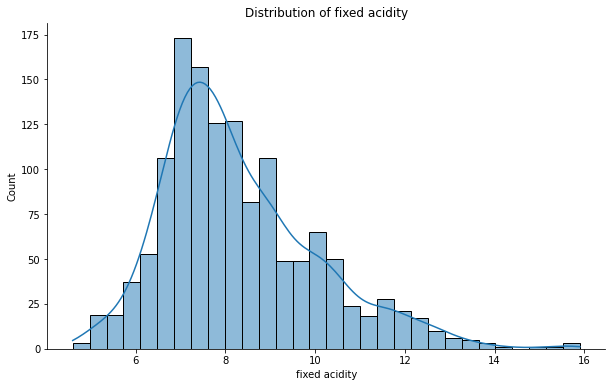

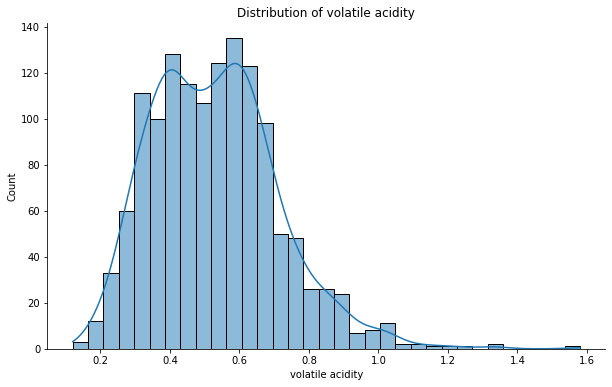

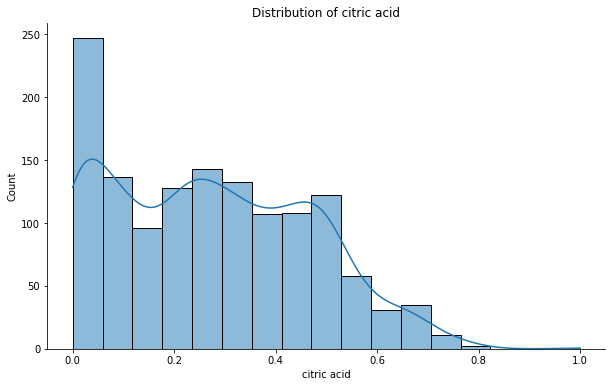

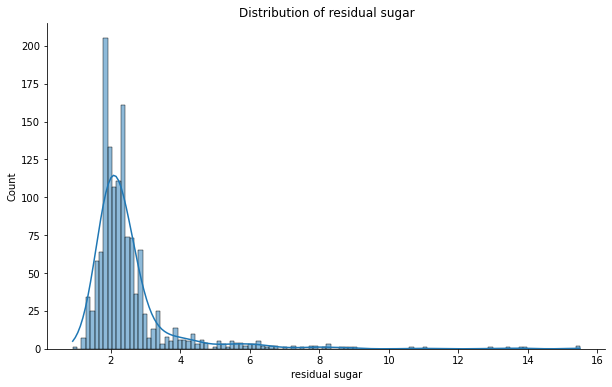

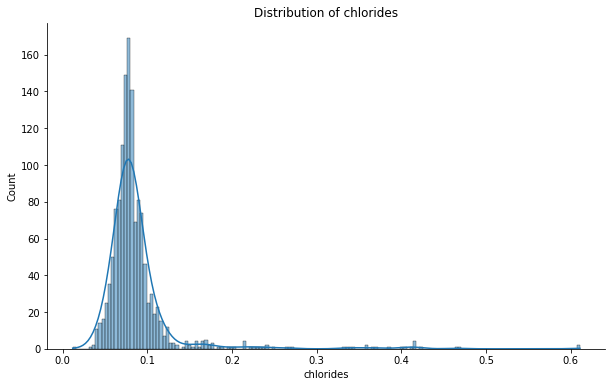

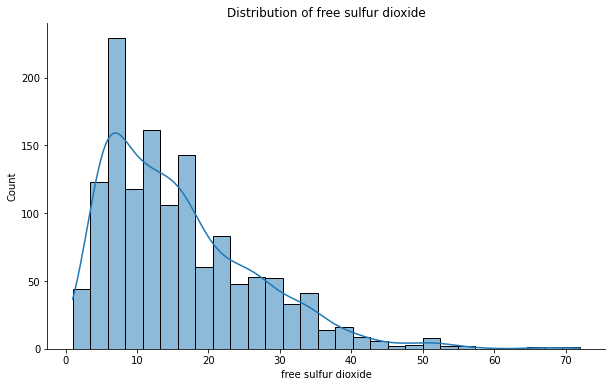

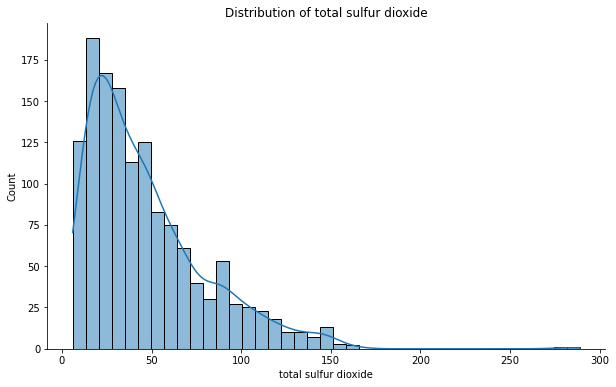

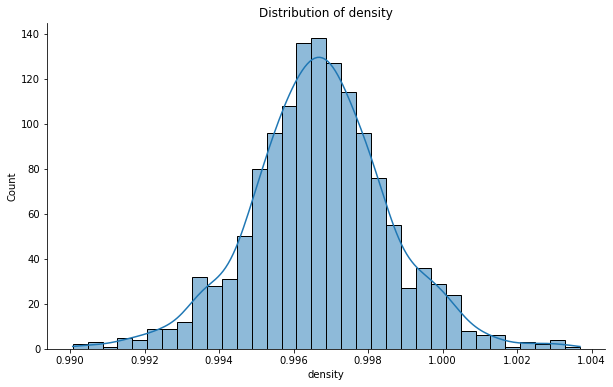

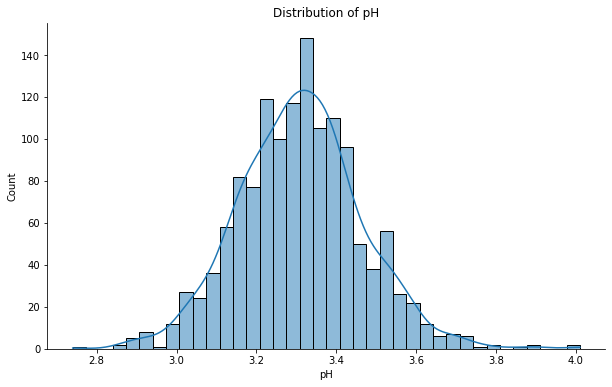

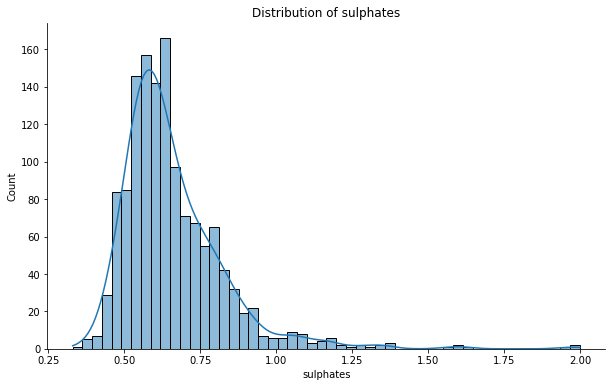

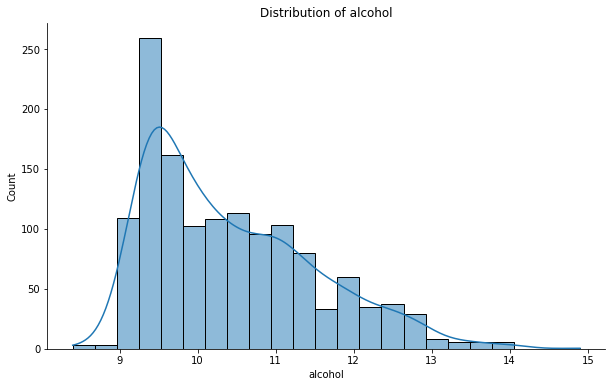

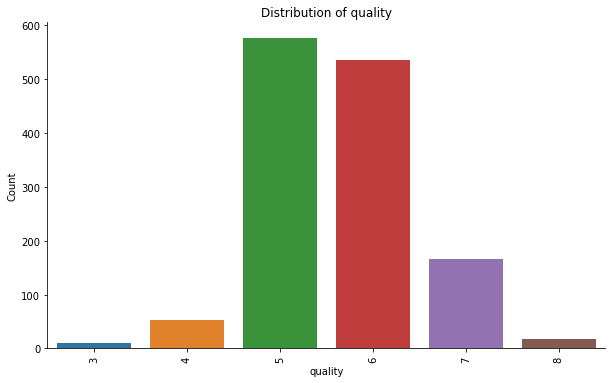

In [21]:
columns = wine_df.columns

for col in columns:
    if wine_df[col].dtype == 'object' or len(wine_df[col].unique()) <= 10:
        plot_type = 'count'
    else:
        plot_type = 'hist'

    create_plot(data=wine_df, x_col=col, y_col=None, plot_type=plot_type, 
                title=f'Distribution of {col}', x_label=col, y_label='Count')

### Univariate Insights

- Fixed Acidity: The distribution seems moderately right-skewed, indicating that most wines have lower fixed acidity, but a few have significantly higher levels.

- Volatile Acidity: The data is slightly right-skewed. Most wines have low to moderate levels of volatile acidity, with fewer wines having high volatile acidity.

- Citric Acid: This feature shows a diverse distribution. A significant number of wines have low citric acid content, but there is a wide spread across different levels.

- Residual Sugar: The majority of wines have low residual sugar, indicating that dry wines are more common in this dataset. There are few wines with high sugar content.

- Chlorides: The chloride content in most wines is relatively low, with the distribution skewed to the right. This suggests that high chloride levels are less common.

- Free Sulfur Dioxide: This distribution is right-skewed, with most wines having lower levels of free sulfur dioxide and a few wines with much higher levels.

- Total Sulfur Dioxide: Similar to free sulfur dioxide, this feature is right-skewed. Most wines have lower total sulfur dioxide, but some have significantly higher levels.

- Density: The distribution of density is quite symmetrical and normal. Most wines have a density around a central value with fewer outliers.

- pH: The pH levels are normally distributed, centered around a neutral pH value, indicating balanced acidity in most wines.

- Sulphates: This feature shows a right-skewed distribution, with most wines having lower sulphate content.

- Alcohol: The alcohol content appears to be somewhat normally distributed, with a slight right skew. This indicates a variety of alcohol levels in the wines, with a concentration around a central value.

- Quality: The quality scores are somewhat normally distributed but slightly left-skewed, indicating that most wines are of average quality, with fewer wines rated as high quality.

### Bivariate

### How does alcohol content relate to the quality of wine?

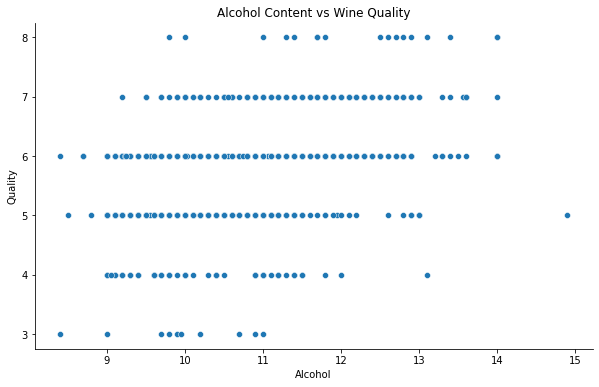

In [22]:
create_plot(data=wine_df, x_col='alcohol', y_col='quality', plot_type='scatter', 
            title='Alcohol Content vs Wine Quality', x_label='Alcohol', y_label='Quality')

Alcohol Content vs Wine Quality:

The scatter plot shows a general trend of increasing wine quality with higher alcohol content.
Wines with higher alcohol percentages tend to have higher quality ratings, suggesting a positive correlation between alcohol content and quality.


### Is there a correlation between fixed acidity and pH levels in wine?

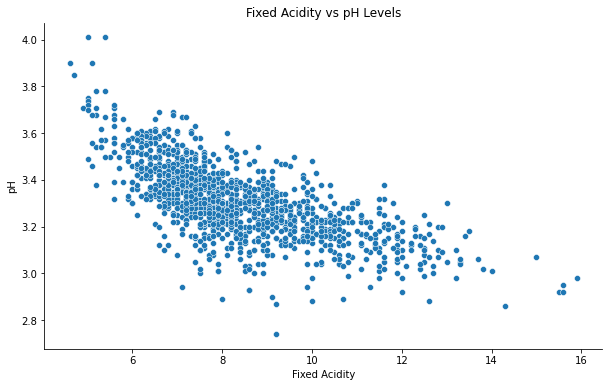

In [23]:
create_plot(data=wine_df, x_col='fixed acidity', y_col='pH', plot_type='scatter', 
            title='Fixed Acidity vs pH Levels', x_label='Fixed Acidity', y_label='pH')

Fixed Acidity vs pH Levels:

There is a noticeable trend of decreasing pH with increasing fixed acidity.
This inverse relationship is consistent with the chemical properties of acids – as the concentration of acid (fixed acidity) increases, the pH level decreases.


### Does the level of residual sugar affect the density of wine?

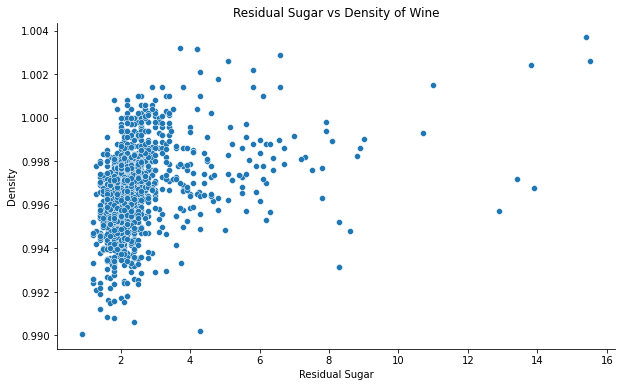

In [24]:
create_plot(data=wine_df, x_col='residual sugar', y_col='density', plot_type='scatter', 
            title='Residual Sugar vs Density of Wine', x_label='Residual Sugar', y_label='Density')

Residual Sugar vs Density of Wine:

The plot indicates a positive correlation between residual sugar and density.
Wines with higher sugar content tend to have higher density, which aligns with the principle that sugar increases the density of liquids.


### How do volatile acidity levels impact wine quality?

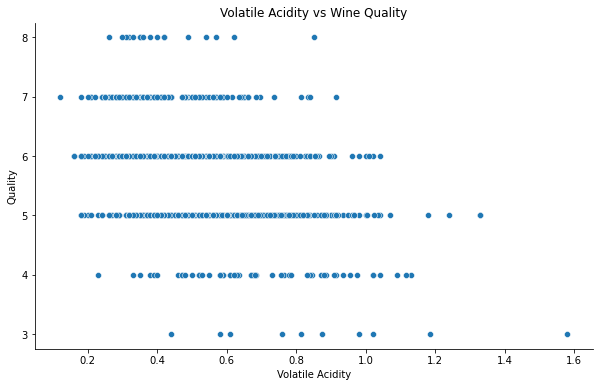

In [25]:
create_plot(data=wine_df, x_col='volatile acidity', y_col='quality', plot_type='scatter', 
            title='Volatile Acidity vs Wine Quality', x_label='Volatile Acidity', y_label='Quality')


Volatile Acidity vs Wine Quality:

The plot shows a trend where higher levels of volatile acidity are associated with lower wine quality.
This suggests that wines with lower volatile acidity are generally rated higher in quality, indicating a negative correlation between volatile acidity and quality.

### Is there a relationship between citric acid content and fixed acidity?

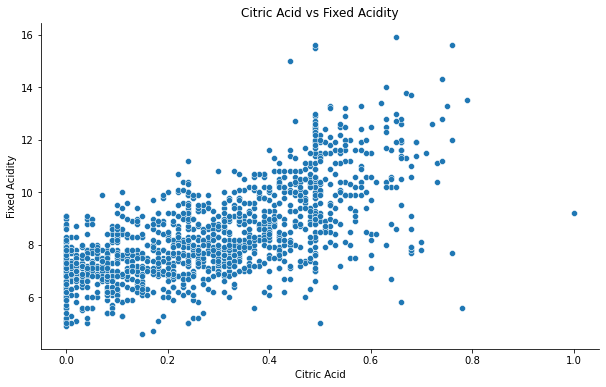

In [26]:
create_plot(data=wine_df, x_col='citric acid', y_col='fixed acidity', plot_type='scatter', 
            title='Citric Acid vs Fixed Acidity', x_label='Citric Acid', y_label='Fixed Acidity')

Citric Acid vs Fixed Acidity:

The scatter plot reveals a positive relationship between citric acid and fixed acidity.
Wines with higher levels of fixed acidity tend to have higher citric acid content. This relationship is logical since citric acid is one of the components that contribute to the total acidity of wine.

### Does the level of sulphates influence the quality of wine?

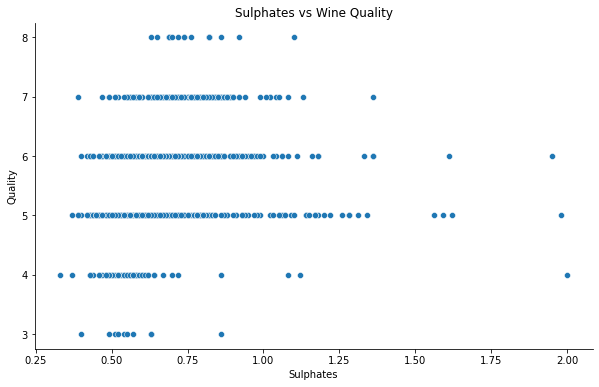

In [27]:
create_plot(data=wine_df, x_col='sulphates', y_col='quality', plot_type='scatter', 
            title='Sulphates vs Wine Quality', x_label='Sulphates', y_label='Quality')

Sulphates vs Wine Quality:

The scatter plot shows a slight trend where higher sulphate levels are associated with higher wine quality.
This suggests a potential positive correlation, indicating that sulphates might play a role in enhancing wine quality, perhaps due to their impact on flavor and preservation.

### How does chloride content correlate with the quality of wine?

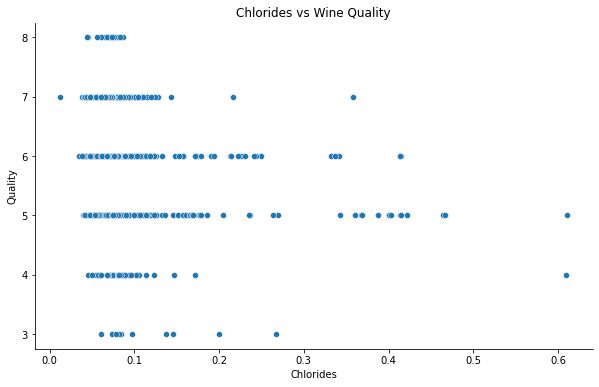

In [28]:
create_plot(data=wine_df, x_col='chlorides', y_col='quality', plot_type='scatter', 
            title='Chlorides vs Wine Quality', x_label='Chlorides', y_label='Quality')

Chlorides vs Wine Quality:

The plot reveals a general trend where higher chloride levels are often associated with lower quality wines.
This negative relationship suggests that excessive chloride content might be detrimental to the perceived quality of wine, possibly affecting taste negatively.

### Is there a link between free sulfur dioxide and total sulfur dioxide levels?

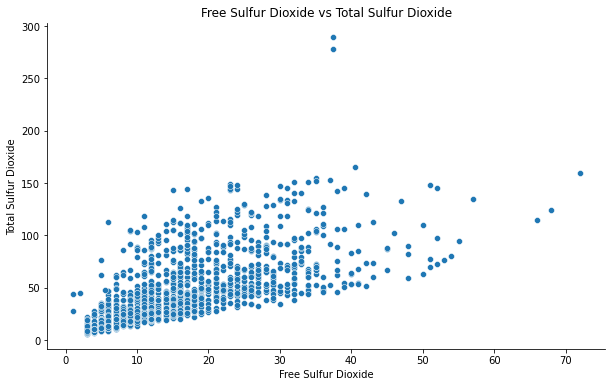

In [29]:
create_plot(data=wine_df, x_col='free sulfur dioxide', y_col='total sulfur dioxide', plot_type='scatter', 
            title='Free Sulfur Dioxide vs Total Sulfur Dioxide', x_label='Free Sulfur Dioxide', y_label='Total Sulfur Dioxide')

Free Sulfur Dioxide vs Total Sulfur Dioxide:

There is a clear positive correlation between free sulfur dioxide and total sulfur dioxide levels.
This relationship is expected as total sulfur dioxide includes the free sulfur dioxide component. Higher free SO2 levels naturally contribute to higher total SO2 levels.

### How does the pH level affect the alcohol content in wine?

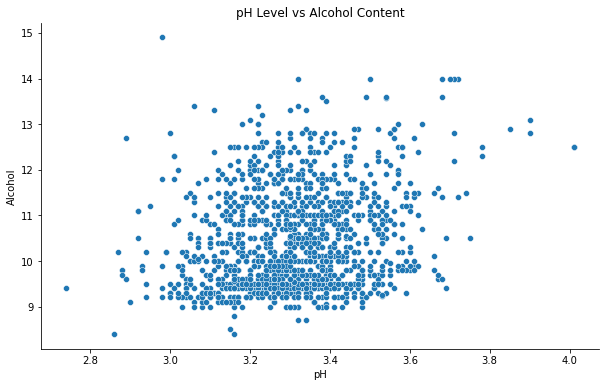

In [30]:
create_plot(data=wine_df, x_col='pH', y_col='alcohol', plot_type='scatter', 
            title='pH Level vs Alcohol Content', x_label='pH', y_label='Alcohol')

pH Level vs Alcohol Content:

The scatter plot does not show a clear, strong relationship between pH level and alcohol content.
This suggests that the acidity of wine (as indicated by pH) does not have a direct or linear relationship with its alcohol content.

### Does a higher level of residual sugar correlate with lower alcohol content?

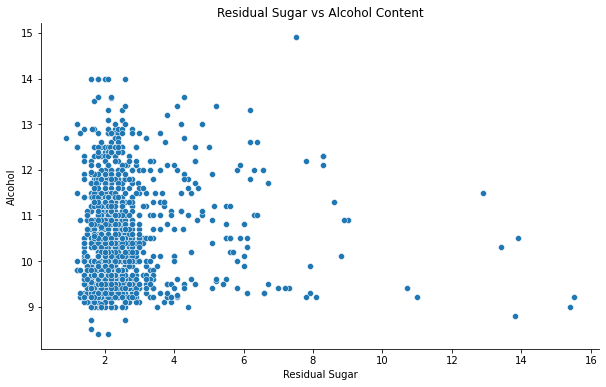

In [31]:
create_plot(data=wine_df, x_col='residual sugar', y_col='alcohol', plot_type='scatter', 
            title='Residual Sugar vs Alcohol Content', x_label='Residual Sugar', y_label='Alcohol')

Residual Sugar vs Alcohol Content:

The plot indicates no strong correlation between residual sugar and alcohol content.
This lack of a clear trend suggests that the sweetness of the wine (residual sugar) does not necessarily relate to its alcohol strength.

### Is there a noticeable trend between density and alcohol content?

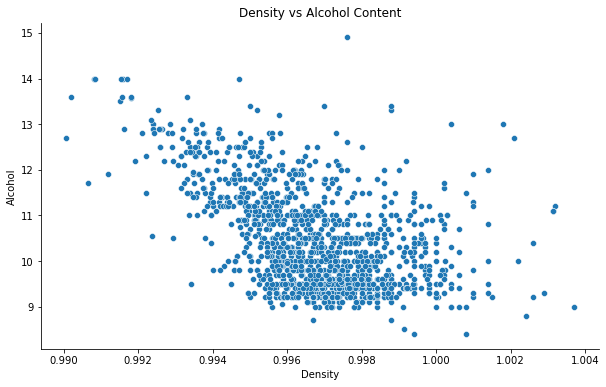

In [33]:
create_plot(data=wine_df, x_col='density', y_col='alcohol', plot_type='scatter', 
            title='Density vs Alcohol Content', x_label='Density', y_label='Alcohol')

Density vs Alcohol Content:

The plot shows a general trend of decreasing alcohol content with increasing density.
This inverse relationship suggests that as wines become denser, they typically have lower alcohol levels, possibly due to the presence of other solutes like sugars.

### How does citric acid content relate to the volatile acidity of wine?

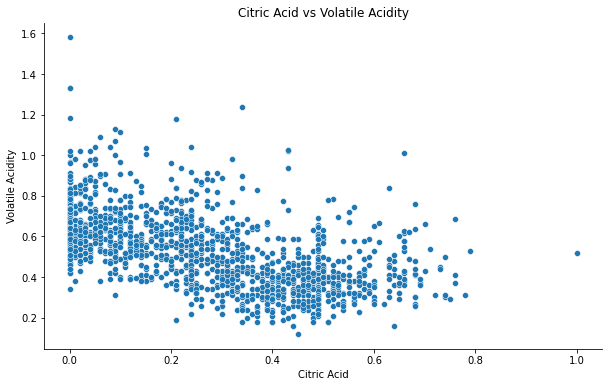

In [34]:
create_plot(data=wine_df, x_col='citric acid', y_col='volatile acidity', plot_type='scatter', 
            title='Citric Acid vs Volatile Acidity', x_label='Citric Acid', y_label='Volatile Acidity')

Citric Acid vs Volatile Acidity:

The scatter plot indicates no strong or clear relationship between citric acid and volatile acidity.
The wide spread of data points suggests that these two acidity measures vary independently of each other in the wines.

### Does higher fixed acidity lead to higher total sulfur dioxide?

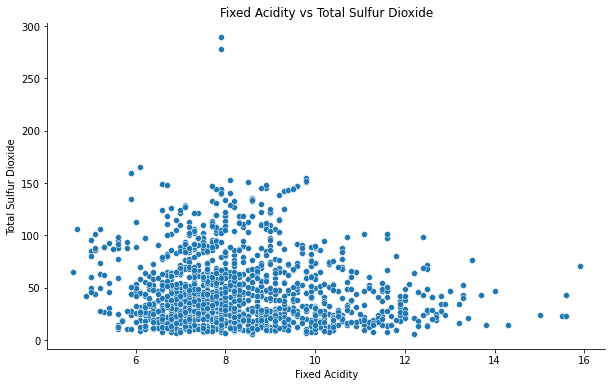

In [35]:
create_plot(data=wine_df, x_col='fixed acidity', y_col='total sulfur dioxide', plot_type='scatter', 
            title='Fixed Acidity vs Total Sulfur Dioxide', x_label='Fixed Acidity', y_label='Total Sulfur Dioxide')

Fixed Acidity vs Total Sulfur Dioxide:

The plot does not show a clear, strong relationship between fixed acidity and total sulfur dioxide.
There's a wide dispersion of sulfur dioxide levels across different fixed acidity levels, indicating that these variables do not have a straightforward linear correlation.

### Is there a correlation between sulphates and chlorides in wine?

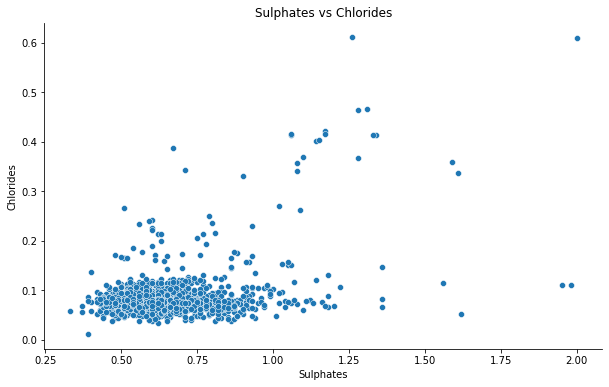

In [36]:
create_plot(data=wine_df, x_col='sulphates', y_col='chlorides', plot_type='scatter', 
            title='Sulphates vs Chlorides', x_label='Sulphates', y_label='Chlorides')

Sulphates vs Chlorides:

The scatter plot reveals no apparent strong correlation between sulphates and chlorides in the wines.
The variables seem to vary independently, suggesting that the levels of sulphates and chlorides are controlled by different factors in wine production.

### How does the level of free sulfur dioxide relate to the pH of wine?

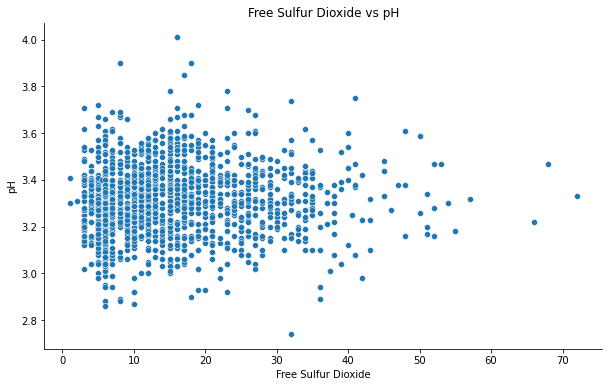

In [32]:
create_plot(data=wine_df, x_col='free sulfur dioxide', y_col='pH', plot_type='scatter', 
            title='Free Sulfur Dioxide vs pH', x_label='Free Sulfur Dioxide', y_label='pH')

Free Sulfur Dioxide vs pH:

The plot does not indicate a strong relationship between free sulfur dioxide and pH levels.
This suggests that the buffering capacity or acidity level of the wine (pH) does not have a direct correlation with the amount of free sulfur dioxide.

### Multivariate

### How do combinations of fixed acidity, volatile acidity, and citric acid influence wine quality?

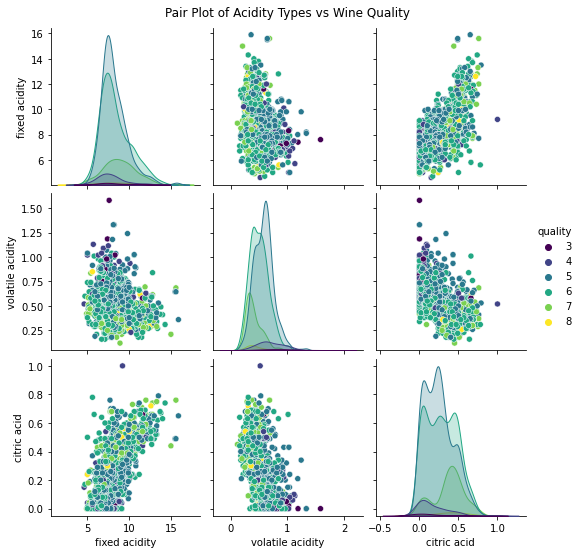

In [38]:
sns.pairplot(wine_df, vars=['fixed acidity', 'volatile acidity', 'citric acid'], hue='quality', palette='viridis')
plt.suptitle('Pair Plot of Acidity Types vs Wine Quality', y=1.02)
plt.show()

> Combinations of Fixed Acidity, Volatile Acidity, and Citric Acid on Wine Quality:

- Fixed Acidity vs Volatile Acidity:

There's a general trend of increasing fixed acidity with increasing volatile acidity. However, the spread is wide, indicating variability in how these two types of acidity correlate.
For higher quality wines (darker hues), the scatter seems less dense, suggesting that the best quality wines do not necessarily have the highest levels of fixed or volatile acidity.

- Fixed Acidity vs Citric Acid:

A positive correlation is observed, indicating that wines with higher fixed acidity tend to have higher citric acid levels. This is expected as both are components of total acidity.
Wines of higher quality appear to have a balanced combination of fixed acidity and citric acid. Extremely high or low levels of these acids are not common in higher quality wines.

- Volatile Acidity vs Citric Acid:

The relationship is less clear, but there seems to be a slight trend where higher citric acid levels correspond to lower volatile acidity, particularly in higher quality wines.
Higher quality wines are clustered in regions of lower volatile acidity, regardless of their citric acid content, suggesting that lower volatile acidity is a more consistent characteristic of higher quality wines.

- Quality Distribution:

The variation in wine quality (indicated by the hue) suggests that while acidity is an important factor, the quality of wine is not determined by these variables alone.
Higher quality wines tend to have moderate levels of these acids, indicating that balance is key. Extremely high or low acidity levels are less common in higher quality wines.

- Considerations for Wine Making:

These insights can be particularly useful for wine makers. Balancing different types of acidity is crucial for crafting high-quality wines.
It's not just about having high or low acidity but finding the right balance that complements other aspects of the wine.

## Correlation

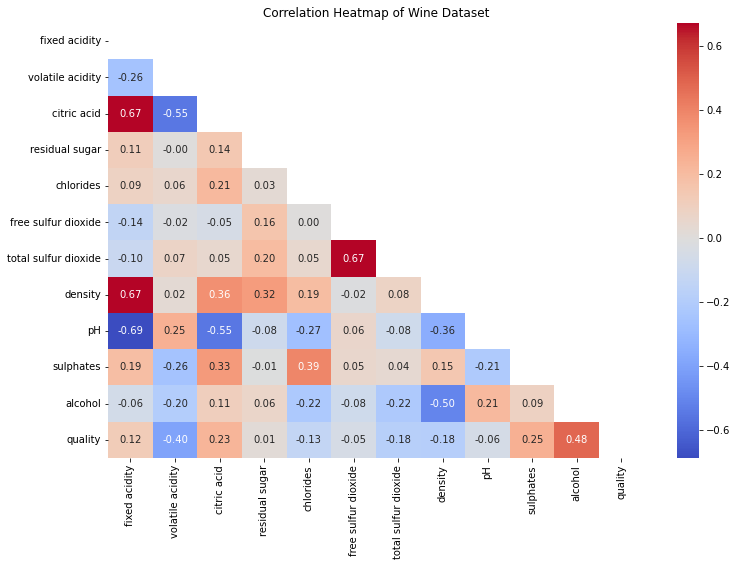

In [37]:
corr_matrix = wine_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Wine Dataset')
plt.show()

- Alcohol and Quality: There's a positive correlation (0.48) between alcohol and quality, suggesting that higher alcohol content often corresponds to higher wine quality.

- Volatile Acidity and Quality: There's a notable negative correlation (-0.39) between volatile acidity and quality, indicating that lower volatile acidity is often associated with higher quality wines.

- Citric Acid and Fixed Acidity: A moderate positive correlation (0.67) exists between citric acid and fixed acidity. This suggests that wines with higher fixed acidity tend to have higher citric acid levels.

- Free Sulfur Dioxide and Total Sulfur Dioxide: A strong positive correlation (0.67) is observed here, indicating that wines with high levels of free sulfur dioxide also tend to have high total sulfur dioxide levels.

- Density and Alcohol: There's a strong negative correlation (-0.50) between density and alcohol, suggesting that higher alcohol wines tend to be less dense. This is expected as alcohol has a lower density than water.

- pH and Fixed Acidity: A negative correlation (-0.68) is observed, which is expected as higher acidity in a solution results in a lower pH.

- Residual Sugar and Density: A moderate positive correlation (0.36) indicates that wines with more residual sugar tend to have a higher density.

- Chlorides and Quality: There's a negative correlation (-0.13) between chlorides and quality, albeit not very strong, suggesting that higher chloride content might slightly reduce wine quality.

# Statistical inference

The target population can be defined as:

All red wines that share similar characteristics to those represented in the data.

### Hypothesis 1 (Alcohol Content and Wine Quality):

- Null Hypothesis (H0): There is no significant correlation between alcohol content and the quality of red wine.
- Alternative Hypothesis (H1): There is a significant positive correlation between alcohol content and the quality of red wine.

In [5]:
# Basic statistics for 'alcohol' and 'quality'
alcohol_stats = wine_df['alcohol'].describe()
quality_stats = wine_df['quality'].value_counts().sort_index()

alcohol_stats, quality_stats

(count    1359.000000
 mean       10.432315
 std         1.082065
 min         8.400000
 25%         9.500000
 50%        10.200000
 75%        11.100000
 max        14.900000
 Name: alcohol, dtype: float64,
 3     10
 4     53
 5    577
 6    535
 7    167
 8     17
 Name: quality, dtype: int64)

In [6]:
confidence_level = 0.95

confidence_intervals = {}
for quality in sorted(wine_df['quality'].unique()):
    alcohol_quality = wine_df[wine_df['quality'] == quality]['alcohol']
    
    mean_alcohol = np.mean(alcohol_quality)
    sem_alcohol = stats.sem(alcohol_quality)
    
    ci = stats.t.interval(confidence_level, len(alcohol_quality)-1, loc=mean_alcohol, scale=sem_alcohol)
    confidence_intervals[quality] = ci

confidence_intervals

{3: (9.36983154065559, 10.540168459344414),
 4: (10.007438153591735, 10.522750525653542),
 5: (9.827242615715747, 9.949880434544216),
 6: (10.569283974670881, 10.748473034674916),
 7: (11.342801738343871, 11.639433790598234),
 8: (11.526484122292393, 12.791162936531135)}

In [7]:
correlation_coefficient, p_value = stats.pearsonr(wine_df['alcohol'], wine_df['quality'])

correlation_coefficient, p_value

(0.4803428980019916, 2.278721132541486e-79)

The Pearson correlation coefficient between alcohol content and wine quality is approximately 0.48, with a very small p-value (around 
2.28
×
1
0
−
79
2.28×10 
−79
 ). This suggests a moderate positive correlation between alcohol content and the quality of red wine.

### Interpretation:
- Correlation Coefficient (0.48): This value indicates a moderate positive correlation. As the alcohol content increases, there is a tendency for the quality of red wine to increase as well.
- P-value: The p-value is extremely small, far below any conventional significance level (e.g., 0.05, 0.01). This indicates that the correlation observed is highly unlikely to be due to chance.

### Conclusion:
Based on the analysis:

- We reject the null hypothesis (H0), which stated that there is no significant correlation between alcohol content and the quality of red wine.
- We accept the alternative hypothesis (H1), which proposed that there is a significant positive correlation between alcohol content and the quality of red wine.
- This analysis suggests that alcohol content is an important factor in determining the quality of red wine. ​​





### Hypothesis 2 (Difference in Average pH between High and Low-Quality Wine):

- Null Hypothesis H0: There is no significant difference in the average pH levels between high-quality (quality rating 7 and above) and low-quality (quality rating below 7) red wines.
- Alternative Hypothesis H1: High-quality red wines have a significantly different average pH level compared to low-quality red wines.

In [8]:
high_quality_wines = wine_df[wine_df['quality'] >= 7]['pH']
low_quality_wines = wine_df[wine_df['quality'] < 7]['pH']

high_quality_pH_stats = high_quality_wines.describe()
low_quality_pH_stats = low_quality_wines.describe()

high_quality_pH_stats, low_quality_pH_stats

(count    184.000000
 mean       3.288587
 std        0.154542
 min        2.880000
 25%        3.200000
 50%        3.270000
 75%        3.370000
 max        3.780000
 Name: pH, dtype: float64,
 count    1175.000000
 mean        3.313106
 std         0.154916
 min         2.740000
 25%         3.210000
 50%         3.310000
 75%         3.400000
 max         4.010000
 Name: pH, dtype: float64)

In [9]:
def calculate_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    ci = stats.t.interval(confidence, len(data)-1, loc=mean, scale=sem)
    return ci

ci_high_quality = calculate_confidence_interval(high_quality_wines)
ci_low_quality = calculate_confidence_interval(low_quality_wines)

ci_high_quality, ci_low_quality

((3.2661084526278845, 3.3110654604155894),
 (3.3042394230416487, 3.321973342915804))

In [10]:
t_statistic, p_value = stats.ttest_ind(high_quality_wines, low_quality_wines)

t_statistic, p_value

(-1.9969732353065248, 0.04602751469577048)

The results of the independent t-test are as follows:

- T-statistic: -1.997
- P-value: 0.046

### Interpretation:
- T-statistic: The negative value suggests that the mean pH level of high-quality wines is lower than that of low-quality wines.
- P-value: The p-value is approximately 0.046, which is just below the conventional significance level of 0.05.

### Conclusion:
Based on the analysis:

- We reject the null hypothesis (H0), which stated that there is no significant difference in the average pH levels between high-quality and low-quality red wines.
- We accept the alternative hypothesis (H1), which proposed that high-quality red wines have a significantly different average pH level compared to low-quality red wines.
- This analysis suggests that there is a statistically significant, albeit small, difference in the average pH levels between high-quality and low-quality red wines.

### Hypothesis 3 (Residual Sugar's Role in Wine Quality):

- Null Hypothesis H0: Residual sugar levels do not significantly influence the quality rating of red wine.
- Alternative Hypothesis H1: Red wines with higher residual sugar levels have significantly different quality ratings compared to those with lower sugar levels.

In [11]:
residual_sugar_stats = wine_df['residual sugar'].describe()
residual_sugar_stats

count    1359.000000
mean        2.523400
std         1.352314
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [12]:
low_sugar_wines = wine_df[wine_df['residual sugar'] <= 2.2]['quality']
high_sugar_wines = wine_df[wine_df['residual sugar'] > 2.2]['quality']

ci_low_sugar = calculate_confidence_interval(low_sugar_wines)
ci_high_sugar = calculate_confidence_interval(high_sugar_wines)

ci_low_sugar, ci_high_sugar

((5.535963201351845, 5.654897013701919),
 (5.59199450675717, 5.7218266314542126))

In [13]:
t_statistic_sugar, p_value_sugar = stats.ttest_ind(low_sugar_wines, high_sugar_wines)

t_statistic_sugar, p_value_sugar


(-1.3702094032300933, 0.1708481806806564)

The results of the independent t-test are as follows:

- T-statistic: -1.370
- P-value: 0.171

### Interpretation:
- T-statistic: The negative value indicates that the mean quality rating of the high residual sugar group is slightly higher than that of the low residual sugar group.
- P-value: The p-value is approximately 0.171, which is above the conventional significance level of 0.05.


### Conclusion:
Based on the analysis:

- We fail to reject the null hypothesis (H0), which stated that residual sugar levels do not significantly influence the quality rating of red wine.
- We cannot accept the alternative hypothesis (H1), which proposed that higher residual sugar levels result in significantly different quality ratings.
- This analysis suggests that, within the dataset, the difference in quality ratings between wines with low and high residual sugar levels is not statistically significant.

# Using Machine Learning to Predict the Quality Column

In [16]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_sm = sm.add_constant(X_train) 
model = sm.OLS(y_train, X_train_sm).fit()

model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     53.08
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.86e-93
Time:                        02:30:36   Log-Likelihood:                -1088.3
No. Observations:                1087   AIC:                             2201.
Df Residuals:                    1075   BIC:                             2261.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -16.8881     26.536     -0.636      0.525     -68.956      35.180
fixed acidity           -0.0288      0.033     -0.877      0.380      -0.093       0.036
volatile acidity        -1.0008      0.149     -6.695      0.000      -1.294      -0.707
citric acid             -0.0980      0.181     -0.541      0.589      -0.454       0.258
residual sugar          -0.0038      0.019     -0.205      0.838      -0.040       0.033
chlorides               -2.2108      0.485     -4.558      0.000      -3.163      -1.259
free sulfur dioxide      0.0047      0.003      1.728      0.084      -0.001       0.010
total sulfur dioxide    -0.0037      0.001     -4.083      0.000      -0.005      -0.002
density                 22.5852     27.089      0.834      0.405     -30.568      75.739
pH                      -0.7987      0.244     -3.271      0.001      -1.278      -0.320
sulphates                0.8546      0.142      6.018      0.000       0.576       1.133
alcohol                  0.3062      0.033      9.350      0.000       0.242       0.370
==============================================================================
Omnibus:                       17.059   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.387
Skew:                          -0.189   Prob(JB):                     1.38e-05
Kurtosis:                       3.593   Cond. No.                     1.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Summary
- R-squared: 0.352 - This indicates that approximately 35.2% of the variability in wine quality is explained by the model.
- Adj. R-squared: 0.345 - Adjusted for the number of predictors in the model.
- F-statistic: 53.08 - This tests whether at least one predictor variable has a non-zero coefficient.
- Prob (F-statistic): 1.86e-93 - Indicates the overall significance of the model.
- AIC: 2201 - Akaike Information Criterion, a measure of the relative quality of the model.
- BIC: 2261 - Bayesian Information Criterion, another measure for model selection.

### Coefficients and Their Significance
- const: The intercept has a large p-value, suggesting it is not statistically significant.
- Fixed Acidity: Not significant (p = 0.380).
- Volatile Acidity: Highly significant (p < 0.001).
- Citric Acid: Not significant (p = 0.589).
- Residual Sugar: Not significant (p = 0.838).
- Chlorides: Highly significant (p < 0.001).
- Free Sulfur Dioxide: Marginally significant (p = 0.084).
- Total Sulfur Dioxide: Significant (p < 0.001).
- Density: Not significant (p = 0.405).
- pH: Significant (p < 0.001).
- Sulphates: Highly significant (p < 0.001).
- Alcohol: Highly significant (p < 0.001).

### Interpretation
- The most significant predictors of wine quality in this model are volatile acidity, chlorides, total sulfur dioxide, pH, sulphates, and alcohol.
- Other features like fixed acidity, citric acid, residual sugar, and density are not significantly influencing the quality according to this model.

## Cross Validation

In [17]:
lr_model = LinearRegression()

cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='r2') 

average_r2 = np.mean(cv_scores)
average_r2_std = np.std(cv_scores)

average_r2, average_r2_std

(0.24524673819263404, 0.19572442915640637)

### Results

- Average R-squared across all folds: Approximately 0.245
- Standard Deviation of R-squared: Approximately 0.196

### Interpretation:
- The average R-squared value of about 0.245 indicates that, on average, the model explains around 24.5% of the variability in wine quality across different subsets of the data. This is lower than the R-squared obtained on the training data (0.352), suggesting that the model's predictive power decreases somewhat when applied to unseen data.
- The standard deviation of 0.196 shows there's variability in the model's performance across different folds. This could be due to the variability in the dataset or the model not generalizing well across different subsets of data.

### Conclusion:
- The cross-validation results suggest that while the linear regression model captures some of the variability in the wine quality data, its predictive performance is moderate and somewhat inconsistent across different data splits. 
- This could indicate a need for more complex modeling approaches or the inclusion of additional relevant features that could better capture the complexities in the data.

In [18]:
ridge = Ridge()
parameters_ridge = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100]}
ridge_regressor = GridSearchCV(ridge, parameters_ridge, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

lasso = Lasso()
parameters_lasso = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100]}
lasso_regressor = GridSearchCV(lasso, parameters_lasso, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

elastic_net = ElasticNet()
parameters_elastic_net = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100], 'l1_ratio': [0.2, 0.5, 0.8]}
elastic_net_regressor = GridSearchCV(elastic_net, parameters_elastic_net, scoring='r2', cv=5)
elastic_net_regressor.fit(X_train, y_train)

best_ridge_params = ridge_regressor.best_params_, ridge_regressor.best_score_
best_lasso_params = lasso_regressor.best_params_, lasso_regressor.best_score_
best_elastic_net_params = elastic_net_regressor.best_params_, elastic_net_regressor.best_score_

best_ridge_params, best_lasso_params, best_elastic_net_params

(({'alpha': 0.01}, 0.33724672620966717),
 ({'alpha': 0.001}, 0.33574314074935757),
 ({'alpha': 0.001, 'l1_ratio': 0.8}, 0.3356052460966811))

## Results

### Ridge Regression
- Best Parameters: Alpha = 0.01
- Best R-squared Score: 0.337

### Lasso Regression
- Best Parameters: Alpha = 0.001
- Best R-squared Score: 0.336

### Elastic Net
- Best Parameters: Alpha = 0.001, L1 Ratio = 0.8
- Best R-squared Score: 0.336

### Interpretation:
- Ridge Regression shows a slightly better R-squared score compared to the other models, though the improvement is marginal.
- Lasso and Elastic Net have similar performance, with Lasso having a very small regularization parameter (alpha), suggesting that most features are retained in the model.
- Elastic Net combines L1 and L2 regularization but yields a score similar to Lasso.

### Conclusion:
- The performance of all three regularized regression models is comparable and only slightly better than the original OLS model.
- The similarity in performance across different models suggests that the dataset may not have strong multicollinearity issues or that the model's predictive power is somewhat limited by the features available.
- Given the slight improvement with Ridge regression, it might be the preferred model if you choose to use regularization. However, the overall gain is modest, indicating the need for potentially more complex models or additional feature engineering to better capture the complexities in predicting wine quality.

# Using Machine Learning to Predict the Alcohol Column

In [5]:
X = wine_df.drop('alcohol', axis=1)
y = wine_df['alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

r_squared, mse, model_sm.summary()

(0.6791784648730625,
 0.34970404844766273,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                alcohol   R-squared:                       0.708
 Model:                            OLS   Adj. R-squared:                  0.705
 Method:                 Least Squares   F-statistic:                     236.5
 Date:                Tue, 09 Jan 2024   Prob (F-statistic):          7.53e-278
 Time:                        20:35:15   Log-Likelihood:                -968.63
 No. Observations:                1087   AIC:                             1961.
 Df Residuals:                    1075   BIC:                             2021.
 Df Model:                          11                                         
 Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
 ----------------

### Results

1. Model Performance:

- R-squared: 0.708. This indicates that approximately 70.8% of the variance in the 'alcohol' variable is explained by the model.
- Mean Squared Error (MSE): 0.350. This gives an indication of the average squared difference between the observed actual outcomes and the outcomes predicted by the model.

2. Statistical Significance of Features:

- The p-values for each coefficient determine the statistical significance of each feature. - - Features with p-values less than 0.05 are typically considered statistically significant.
- In this model, 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide', 'density', 'pH', 'sulphates', and 'quality' are statistically significant predictors of 'alcohol'.
- 'chlorides' and 'free sulfur dioxide' have p-values higher than 0.05, suggesting they might not be significant predictors in this model.

3. Information Criteria:

- Akaike Information Criterion (AIC): 1961.
- Bayesian Information Criterion (BIC): 2021.
- These criteria help in model selection. Lower values of AIC and BIC suggest a better model fit.

4. Model Considerations:

- The condition number is large, indicating potential multicollinearity, which means some predictor variables might be highly correlated with each other. This could affect the model's performance and the interpretability of the coefficients.


In summary, the model performs reasonably well in explaining the variance in the 'alcohol' variable, but care should be taken in interpreting the results due to potential multicollinearity. If needed, further analysis could involve exploring models with interaction terms or polynomial features, or using techniques like regularization to mitigate multicollinearity.

### Suggestions for Improvement:

- Model Enhancement: Experiment with different types of models, including non-linear models, to see if they offer better predictive performance.
- Feature Engineering: Explore the creation of new features or interactions between existing features that might have a significant impact on the target variable.
- In-depth Analysis of Non-significant Features: Investigate why certain features are not significant and whether they can be transformed or combined with other features to become significant.